In [8]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tqdm

from min_max_agent import MinMaxAgent
from qlearning_agent import QleaningAgent, play_game
from tic_tac_toe import TicTacToe, TikTakCounter

Часть первая: крестики-нолики при помощи Q-обучения
В коде, прилагающемся к последней лекции про обучение с подкреплением, реализован Environment для крестиков-ноликов, в котором можно при инициализации указывать разные размеры доски и условия победы, а также функции для рисования, в том числе с указанием оценки различных действий. С этим окружением все задания и связаны.

Для размера 3x3 можно сравнить минимакс агентом, для таких размеров он еще работает

In [30]:
env = TicTacToe(3, 3, 3)
agent1 = QleaningAgent(env)
agent2 = MinMaxAgent(env)

In [31]:
counter1 = TikTakCounter(100)
N_GAME=100_000
for i in tqdm.tqdm(range(N_GAME)):
    play_game(env, agent2, agent1, counter1, False, False, verbose=False)
    counter1.tot += 1
    counter1.update_history()

100%|██████████| 100000/100000 [01:29<00:00, 1115.47it/s]


In [32]:
counter1

cross=49 naughts=0 tot=100000 draw=99870 invalid=81

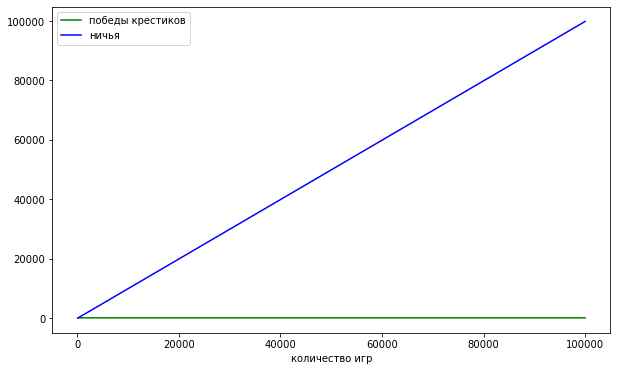

In [34]:
plt.figure(figsize=(10,6))
x, y = counter1.tot_list,  counter1.cross_list
ax1, = plt.plot(x,y, linestyle='-', color='g')

x, y = counter1.tot_list,  counter1.draw_list
ax2, = plt.plot(x,y, linestyle='-', color='b')


plt.legend([ax1, ax2], ['победы крестиков', 'ничья'])
plt.xlabel('количество игр')
plt.show()

Для игры 3x3 Q-learning достаточно хорошо справляется с минимаксной стратегией, поробуем 4x4 и случайную стратегию

In [ ]:
env = TicTacToe(4, 4, 4)
agent3 = QleaningAgent(env)
counter3 = TikTakCounter(100)
N_GAME=100_000
for i in tqdm.tqdm(range(N_GAME)):
    play_game(env, agent3, None, counter3,
                    False, True, verbose=False)
    counter3.tot += 1
    counter3.update_history()

 45%|████▌     | 45479/100000 [07:59<14:00, 64.87it/s] 

In [ ]:
print(counter3)

In [ ]:
plt.figure(figsize=(10,6))
x, y = counter3.tot_list,  counter3.cross_list
ax1, = plt.plot(x,y, linestyle='-')

x, y = counter3.tot_list,  counter3.draw_list
ax2, = plt.plot(x,y, linestyle='-')

x, y = counter3.tot_list,  counter3.naughts_list
ax3, = plt.plot(x,y, linestyle='-')

plt.legend([ax1, ax2, ax3], ['победы крестиков', 'ничья', 'победа ноликов'])
plt.xlabel('количество игр')
plt.show()